In [14]:
import pandas as pd
import scipy.stats
import numpy as np

df = pd.read_csv('Pulsesurvey_New.csv')
df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Interest,Down,Hlthins4,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income
0,1962,2,1,4,4,2,0,3,2,2,...,1,1,1,2,2,2,2,1,-88,-88
1,1941,1,1,1,5,1,0,1,2,2,...,3,3,2,-99,2,2,2,2,-88,4
2,1951,2,1,1,4,3,0,3,2,2,...,3,2,2,2,2,2,2,1,-88,-99
3,1978,1,1,2,3,1,4,2,1,2,...,1,2,1,1,2,2,2,3,-99,3
4,1985,2,1,1,6,1,3,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [28]:
indexNames = df[df['Getvacc'] == 3].index
indexNames2 = df[df['Getvacc'] == 2].index

df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)

df['binary']=df['Getvacc'].apply(lambda x: 0 if(x==4) else(1))
df['Birthyear_bins'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011])
df['Birthyear_codes'] = pd.cut(x=df['Birthyear'], bins=[1931, 1951, 1961, 1971, 1981, 1991, 2011], labels=[1,2,3,4,5,6])
df

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income,binary,Birthyear_bins,Birthyear_codes
1,1941,1,1,1,5,1,0,1,2,2,...,-99,2,2,2,2,-88,4,1,"(1931, 1951]",1
4,1985,2,1,1,6,1,3,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,1,"(1981, 1991]",5
6,1956,1,1,1,7,1,0,1,2,2,...,1,2,2,2,2,-88,4,1,"(1951, 1961]",2
7,1979,2,1,1,7,1,3,1,2,2,...,2,2,2,1,2,1,8,1,"(1971, 1981]",4
10,1969,2,1,1,6,3,1,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,1,"(1961, 1971]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127253,1983,2,1,1,4,1,3,4,1,1,...,-88,-88,-88,-88,-88,-88,-88,0,"(1981, 1991]",5
127254,1973,1,1,1,6,1,0,1,1,2,...,-99,2,2,2,2,-88,8,1,"(1971, 1981]",4
127256,1962,1,1,1,7,1,0,1,1,2,...,2,2,1,2,2,-88,7,1,"(1961, 1971]",3
127257,1969,1,1,1,4,5,0,1,2,2,...,2,2,2,2,1,-88,4,1,"(1961, 1971]",3


In [45]:
df_new = df[(df['Education']>0) & (df['Expensdiff']>0) & (df['Income']>0) & (df['Maritalstatus']>0) & (df['Kindwork']>0) & (df['Numkid']>0) & (df['Tenure']>0)]
df_new

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income,binary,Birthyear_bins,Birthyear_codes
7,1979,2,1,1,7,1,3,1,2,2,...,2,2,2,1,2,1,8,1,"(1971, 1981]",4
13,1982,2,1,4,3,1,5,4,2,2,...,1,2,2,2,3,-99,6,0,"(1981, 1991]",5
25,1981,2,1,1,4,1,2,1,1,2,...,2,2,2,2,2,-99,5,1,"(1971, 1981]",4
37,1973,1,2,1,4,1,1,1,2,2,...,2,2,1,2,2,-88,8,1,"(1971, 1981]",4
50,1979,2,1,2,6,3,1,1,2,2,...,-99,2,2,2,3,-99,4,1,"(1971, 1981]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127188,1961,2,1,2,7,2,1,1,2,2,...,2,2,2,1,2,-99,8,1,"(1951, 1961]",2
127192,1962,1,1,2,7,1,2,1,2,2,...,1,2,2,2,2,-99,8,1,"(1961, 1971]",3
127193,1965,2,1,2,6,3,1,1,2,2,...,2,2,1,2,3,-88,5,1,"(1961, 1971]",3
127222,1988,2,1,1,6,1,1,1,2,1,...,2,1,1,2,2,1,4,1,"(1981, 1991]",5


In [70]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [219]:
X = df_new[['Birthyear_codes', 'Income', 'Education']]
y = df_new["binary"]

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [220]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 40.009356
Feature 1: 456.859991
Feature 2: 244.140656
Feature 3: 159.873632
Feature 4: 6.105954
Feature 5: 50.364080
Feature 6: 22.408583
Feature 7: 192.357214


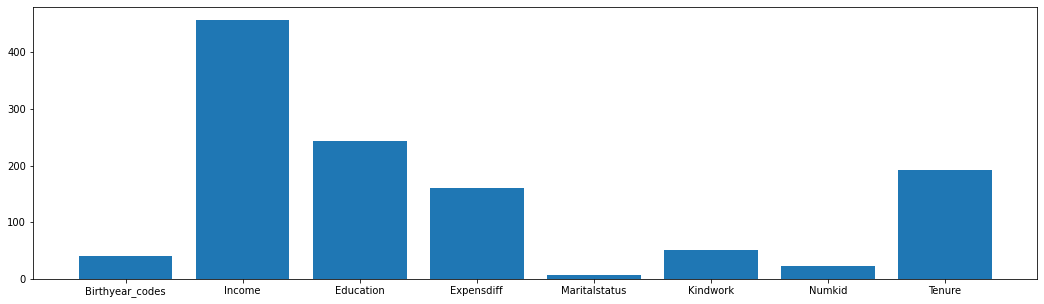

In [167]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

f, ax = plt.subplots(figsize=(18,5))
plt.bar(x_labels, fs.scores_)
x_labels = ['Birthyear_codes', 'Income', 'Education', 'Expensdiff', 'Maritalstatus', 'Kindwork', 'Numkid', 'Tenure']
plt.show()

Feature 0: 0.008276
Feature 1: 0.036252
Feature 2: 0.043421
Feature 3: 0.011883
Feature 4: 0.000000
Feature 5: 0.010054
Feature 6: 0.002785
Feature 7: 0.009967


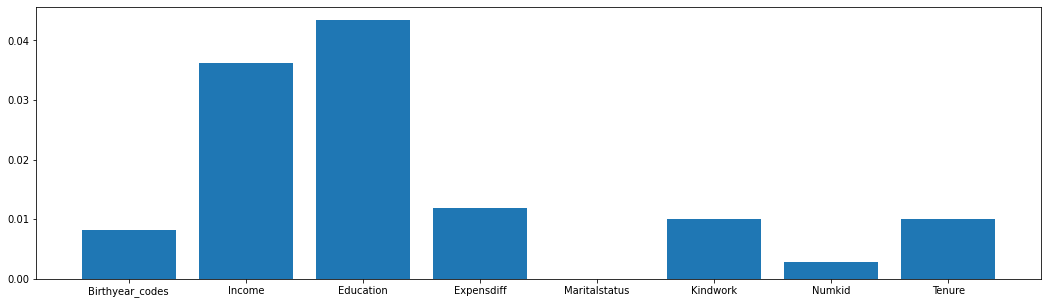

In [168]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train_enc, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
f, ax = plt.subplots(figsize=(18,5))
plt.bar(x_labels, fs.scores_)
x_labels = ['Birthyear_codes', 'Income', 'Education', 'Expensdiff', 'Maritalstatus', 'Kindwork', 'Numkid', 'Tenure']
plt.show()

In [215]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn import preprocessing

Training score data:
0.839910409556314
Accuracy: 84.67


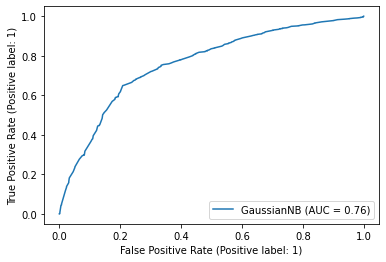

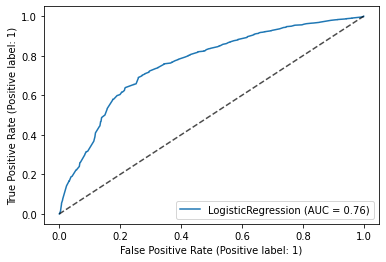

In [221]:
GNB = GaussianNB()

model1 = GNB.fit(X_train_fs, y_train_enc)
yhat = model1.predict(X_test_fs)
print('Training score data:')
print(model1.score(X_train_fs, y_train_enc))

model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train_fs, y_train_enc)
y_pred_2 = model2.predict(X_test_fs)

accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

GNB_disp = plot_roc_curve(GNB, X_test_fs, y_test_enc)
model2_disp = plot_roc_curve(model2, X_test_fs, y_test_enc)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

In [217]:
y_pred = model1.predict(X_test_fs)

print(accuracy_score(y_test_enc,y_pred))
print("\n")
print(confusion_matrix(y_test_enc, y_pred))
print("\n")
print(classification_report(y_test_enc, y_pred))

0.8317989549639214


[[ 185  362]
 [ 314 3158]]


              precision    recall  f1-score   support

           0       0.37      0.34      0.35       547
           1       0.90      0.91      0.90      3472

    accuracy                           0.83      4019
   macro avg       0.63      0.62      0.63      4019
weighted avg       0.83      0.83      0.83      4019



In [207]:
print(accuracy_score(y_test_enc ,y_pred_2))
print("\n")
print(confusion_matrix(y_test_enc, y_pred_2))
print("\n")
print(fbeta_score(y_test, y_pred_2, beta=2))

0.8606618561831302


[[  47  500]
 [  60 3412]]


0.958426966292135


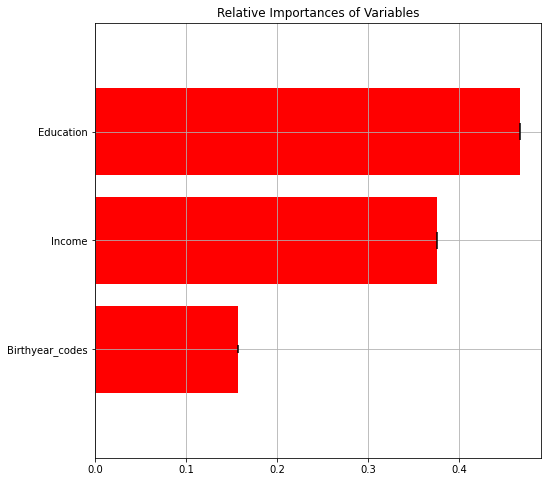

In [222]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

forest = ExtraTreesClassifier(n_estimators=200, random_state=17)
forest.fit(X_train_fs, y_train_enc)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)
feature_names = X.columns

plt.figure(figsize=(8,8))
plt.title("Relative Importances of Variables")
plt.barh(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.grid()
plt.show()

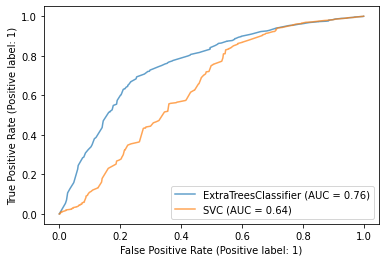

In [224]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

forest.fit(X_train_fs, y_train_enc)
ax = plt.gca()
forest_disp = plot_roc_curve(forest, X_test_fs, y_test_enc, ax=ax, alpha=0.7)

svc = SVC(random_state=42)
svc.fit(X_train_fs, y_train_enc)
svc_disp = plot_roc_curve(svc, X_test_fs, y_test_enc, ax=ax, alpha=0.7)
plt.show()

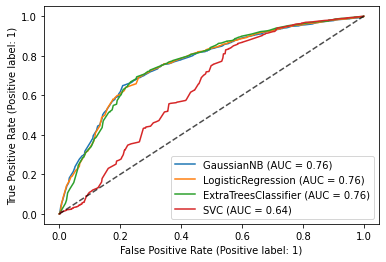

In [225]:
def Check(list_of_disp):
    ax = plt.gca()
    for i in list_of_disp: 
        i.plot(ax=ax)
    plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
    plt.show()

list_of_disp = [GNB_disp,model2_disp,forest_disp, svc_disp]
Check(list_of_disp)